# Ejemplo LMA - Keras 2

# Ejemplo regresión lineal (SGD) con Keras 

In [3]:
pip install tensorflow

     |███████████████████             | 296.6 MB 3.9 MB/s eta 0:00:52   |▌                               | 7.7 MB 827 kB/s eta 0:09:53     |▋                               | 9.6 MB 904 kB/s eta 0:09:00     |▊                               | 10.8 MB 771 kB/s eta 0:10:32     |█                               | 16.3 MB 297 kB/s eta 0:26:59     |█▍                              | 22.3 MB 948 kB/s eta 0:08:22     |█▊                              | 27.5 MB 1.4 MB/s eta 0:05:43     |█▉                              | 29.3 MB 1.4 MB/s eta 0:05:24     |██                              | 32.0 MB 1.1 MB/s eta 0:06:46     |██▎                             | 34.7 MB 1.3 MB/s eta 0:06:09     |██▎                             | 35.5 MB 1.2 MB/s eta 0:06:21     |██▉                             | 44.7 MB 1.2 MB/s eta 0:06:07     |███                             | 45.7 MB 1.1 MB/s eta 0:06:53     |███                             | 48.2 MB 1.4 MB/s eta 0:05:16     |███▎                            | 51.2 MB 1.4

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
from tensorflow.keras.optimizers import SGD

In [9]:
# Librerías generales
import pandas as pd
import numpy as np

# Librerías para visualización
%pylab
%matplotlib inline
%config InlineBacked.figure_format='retina'
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Librerías Keras
from keras.models import Sequential
from keras.layers.core import Dense


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [10]:
data = pd.read_csv('systolic_blood.csv')

## EDA

In [11]:
data.head()

,Age,Systolic_blood_pressure
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142


In [12]:
data.shape

(29, 2)

In [13]:
data.describe()

,Age,Systolic_blood_pressure
count,29.000000,29.000000
mean,45.068966,139.862069
std,15.560782,17.504538
min,17.000000,110.000000
25%,36.000000,125.000000
50%,45.000000,140.000000
75%,56.000000,154.000000
max,69.000000,175.000000


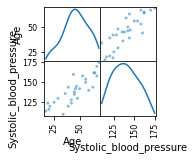

In [14]:
scatter_matrix(data, 
               figsize=(len(data.columns),
                              len(data.columns)),
               diagonal = 'kde');

Al ser solamente dos variables, mostramos el diagrama de dispersión

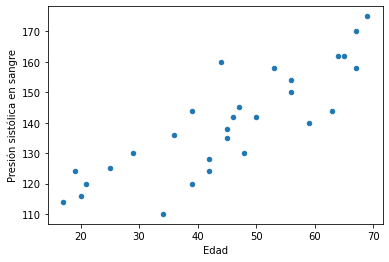

In [15]:
# Al graficar los datos se observa una tendencia lineal
data.plot.scatter(x='Age', y='Systolic_blood_pressure')
plt.xlabel('Edad')
plt.ylabel('Presión sistólica en sangre')
plt.show()

In [8]:
# X_tra = np.asarray(data.iloc[:, 0:8])

In [16]:
X = data['Age'].values
Y = data['Systolic_blood_pressure'].values

In [17]:
type(X)

numpy.ndarray

### 1 - Definición del modelo

In [18]:
input_dim = 1
output_dim = 1

model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

### 2- Compilación del modelo

En este caso, vamos a definir un optimizador que a diferencia de otros optimizadores como 'adam' o 'RMSProp', necesita que configuremos ciertos parámetros.

In [19]:
sgd = SGD(lr=0.0004)
model.compile(loss='mse', optimizer=sgd)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 3- Ajuste del modelo

In [20]:
num_epochs = 20
batch_size = 2
history = model.fit(X, Y, 
              epochs=num_epochs, 
              batch_size=batch_size, 
              verbose=0)

### 4 - Obtención de métricas y resultados.

En un modelo de regresión lineal al utilizar una función de pérdida de gradiente descendente, lo que obtenemos en 'loss' es el valor del error cuadrático medio.

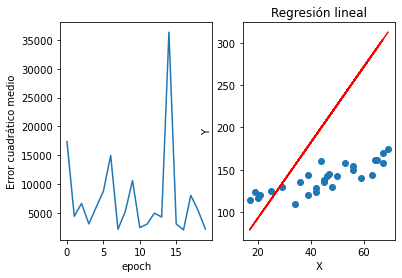

In [21]:
# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('Error cuadrático medio')

# Realizamos las predicciones sobre el conjunto X
predicciones_regression = model.predict(X)

plt.subplot(1, 2, 2)
plt.scatter(X,Y)
plt.plot(X, predicciones_regression,'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal')
plt.show()

### 5 - Predicciones

In [23]:
# predicciones = model.predict_classes(X_tra)

In [24]:
# Predicción
x_pred = np.array([85])
y_pred = model.predict(x_pred)
print("La presión sanguínea será de --> ", y_pred[0][0], " para una persona de: ", x_pred[0], " años")

La presión sanguínea será de -->  237.39806  para una persona de:  85  años


In [25]:
x_pred = np.array([20])
y_pred = model.predict(x_pred)
print("La presión sanguínea será de --> ", y_pred[0][0], " para una persona de: ", x_pred[0], " años")

La presión sanguínea será de -->  74.104866  para una persona de:  20  años


In [26]:
x_pred = np.array([110])
y_pred = model.predict(x_pred)
print("La presión sanguínea será de --> ", y_pred[0][0], " para una persona de: ", x_pred[0], " años")

La presión sanguínea será de -->  300.20312  para una persona de:  110  años


In [27]:
x_pred = np.array([30])
y_pred = model.predict(x_pred)
print("La presión sanguínea será de --> ", y_pred[0][0], " para una persona de: ", x_pred[0], " años")

La presión sanguínea será de -->  99.22689  para una persona de:  30  años
